# 8.1　绘制等高线图

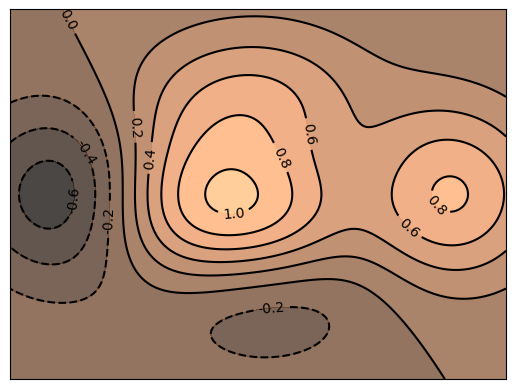

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 计算高度
def calcu_elevation(x1, y1):
    h = (1-x1/2  + x1 ** 5 + y1 ** 3)  * np.exp(-x1** 2 - y1** 2)
    return h
n = 256
x = np.linspace(-2, 2, n)
y = np.linspace(-2, 2, n)
# 利用 meshgrid() 函数生成网格数据
x_grid, y_grid = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制等高线
con = ax.contour(x_grid, y_grid, calcu_elevation(x_grid, y_grid), 8, colors='black')
# 填充等高线的颜色
ax.contourf(x_grid, y_grid, calcu_elevation(x_grid, y_grid), 8, alpha=0.75, cmap=plt.cm.copper)
# 为等高线添加文字标签
ax.clabel(con, inline=True, fmt='%1.1f', fontsize=10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# 8.2　绘制矢量场流线图

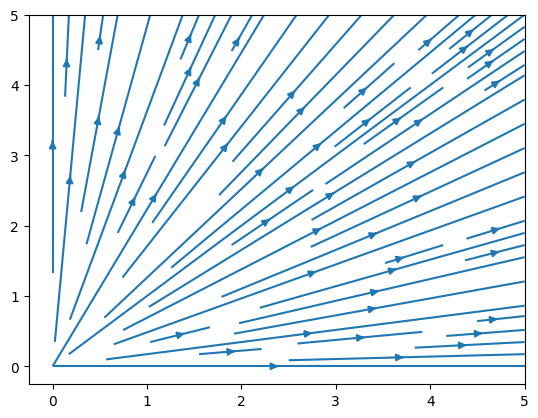

In [2]:
import numpy as np
import matplotlib.pyplot as plt
y, x = np.mgrid[0:5:50j, 0:5:50j]
u = x
v = y
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制矢量场流线图
ax.streamplot(x, y, u, v)
plt.show()

# 8.3　绘制棉棒图

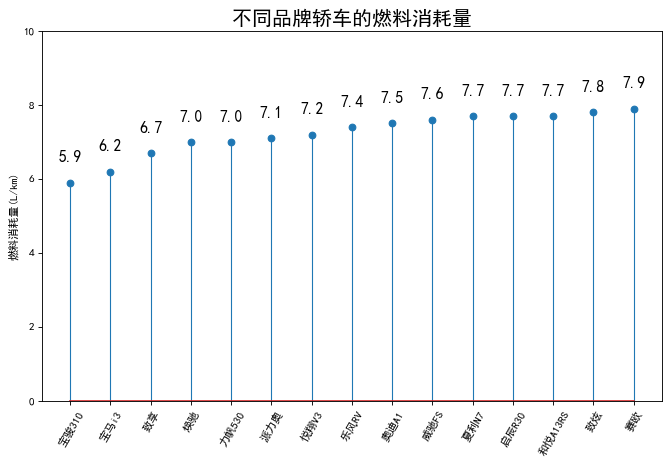

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
x = np.arange(1, 16)
y = np.array([5.9, 6.2, 6.7, 7.0, 7.0, 7.1, 7.2, 7.4, 
              7.5, 7.6, 7.7, 7.7, 7.7, 7.8, 7.9])
labels = np.array(['宝骏310', '宝马i3', '致享', '焕驰', '力帆530', 
                   '派力奥', '悦翔V3', '乐风RV', '奥迪A1', '威驰FS', 
                   '夏利N7', '启辰R30', '和悦A13RS', '致炫', '赛欧'])
fig = plt.figure(figsize=(10, 6), dpi= 80)
ax = fig.add_subplot(111)
# 绘制棉棒图
markerline, stemlines, baseline = ax.stem(x, y, linefmt='-', markerfmt='o', label='TestStem')
# 设置棉棒图线段的属性
plt.setp(stemlines, lw=1)
ax.set_title('不同品牌轿车的燃料消耗量', fontdict={'size':18})
ax.set_ylabel('燃料消耗量(L/km)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=60)
ax.set_ylim([0, 10])
for temp_x, temp_y in zip(x, y):
    ax.text(temp_x, temp_y + 0.5, s='{}'.format(temp_y), ha='center', va='bottom', fontsize=14)
plt.show()

# 8.4　绘制哑铃图

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_excel(r"C:\Users\admin\Desktop\health.xlsx")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)
df = df.sort_values(by="index")
def newline(p1, p2, color='black'):
    ax = plt.gca()     # 获取当前的绘图区域
    l = mlines.Line2D([p1[0], p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# 绘制散点
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)
# 绘制线条
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014' ]):
    newline([p1, i], [p2, i])
ax.set_title("2013年与2014年美国部分城市人口PCT指标的变化率", fontdict={'size':12})
ax.set_xlim(0, .25)
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '10%', '15%', '20%'])
ax.set_xlabel('变化率')
ax.set_yticks(df['index'])
ax.set_yticklabels(df['city'])
ax.grid(alpha=0.5, axis='x')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\admin\\Desktop\\health.xlsx'

# 8.5　绘制甘特图

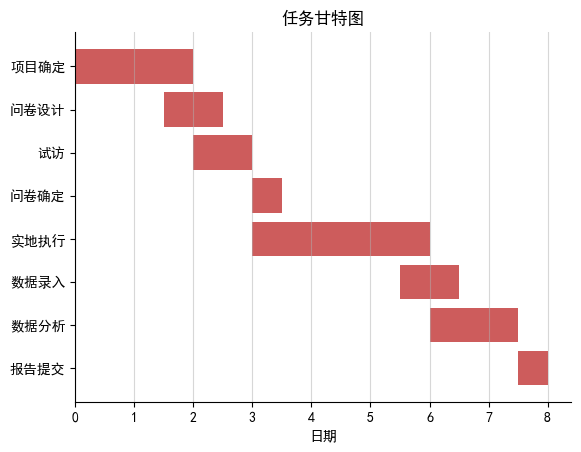

In [5]:
import numpy as np
import matplotlib.pyplot as plt
ticks = np.array(['报告提交', '数据分析', '数据录入', '实地执行', 
                  '问卷确定', '试访', '问卷设计', '项目确定'])
y_data = np.arange(1, 9)
x_data = np.array([0.5, 1.5, 1, 3, 0.5, 1, 1, 2])
fig,ax = plt.subplots(1, 1)
ax.barh(y_data, x_data, tick_label=ticks, left=[7.5, 6, 5.5, 3, 3, 2, 1.5, 0], color='#CD5C5C') 
[ax.spines[i].set_visible(False) for i in ['top', 'right']]
ax.set_title("任务甘特图")
ax.set_xlabel("日期")
ax.grid(alpha=0.5, axis='x')
plt.show()

# 8.6　绘制人口金字塔图

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_excel(r'C:\Users\admin\Desktop\population.xlsx')
df_male = df.groupby(by='Gender').get_group('Male')
list_male = df_male['Number'].values.tolist()      #  将ndarray 转换为 list
df_female = df.groupby(by='Gender').get_group('Female')
list_female = df_female['Number'].values.tolist()  # 将ndarray 转换为 list
df_age = df.groupby('AgeGroup').sum()
count = df_age.shape[0]
y = np.arange(1, 11)
labels = []
for i in range(count):
    age = df_age.index[i]
    labels.append(age)
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制人口金字塔图
ax.barh(y, list_male, tick_label=labels, label=' 男', color='#6699FF') 
ax.barh(y, list_female, tick_label=labels, label=' 女', color='#CC6699')
ax.set_ylabel("年龄段（岁）")
ax.set_xticks([-100000, -75000, -50000, -25000, 0, 25000, 50000, 75000, 100000])
ax.set_xticklabels(['100000', '75000', '50000', '25000', 
                    '0', '25000', '50000', '75000', '100000'])
ax.set_xlabel("人数（个）")
ax.set_title('某城市人口金字塔')
ax.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\admin\\Desktop\\population.xlsx'

# 8.7　绘制漏斗图

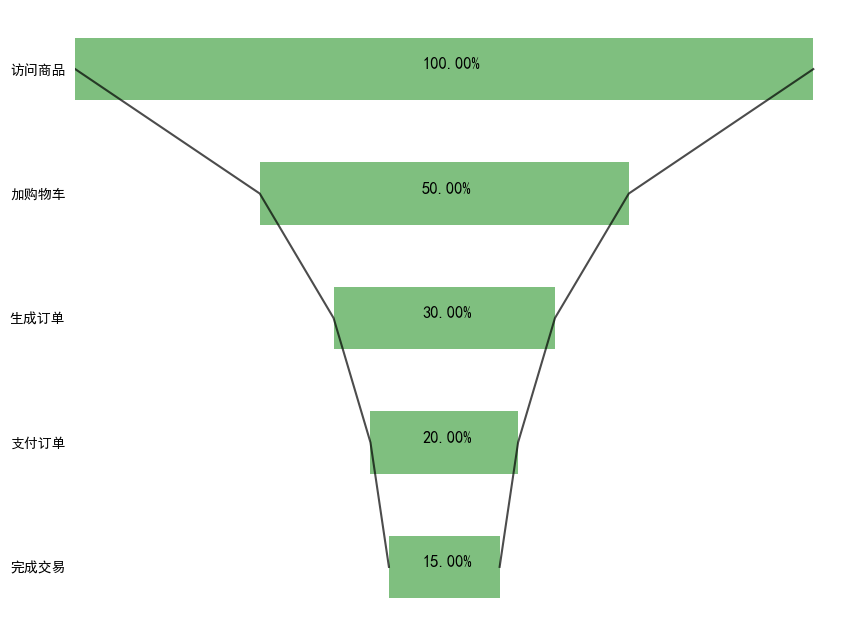

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
num = 5
height = 0.5
x1 = np.array([1000, 500, 300, 200, 150])    # 各环节的客户数量
x2 = np.array((x1.max() - x1) / 2)
x3 = [i +j for i, j in zip(x1, x2)]
x3 = np.array(x3)
y = -np.sort(-np.arange(num))               # 倒转y轴
labels=['访问商品', '加购物车', '生成订单', '支付订单', '完成交易']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# 绘制条形图
rects1 = ax.barh(y, x3, height, tick_label=labels, color='g', alpha=0.5)
# 绘制辅助条形图
rects2 = ax.barh(y, x2, height, color='w', alpha=1) 
ax.plot(x3, y, 'black', alpha=0.7)
ax.plot(x2, y, 'black', alpha=0.7)
# 添加无指向型注释文本
notes = []
for i in range(0, len(x1)):
    notes.append('%.2f%%'%((x1[i] / x1[0]) * 100))
for rect_one, rect_two, note in zip(rects1, rects2, notes):
    text_x = rect_two.get_width() + (rect_one.get_width() - rect_two.get_width()) / 2 - 30
    text_y = rect_one.get_y() + height / 2
    ax.text(text_x, text_y, note, fontsize=12)
# 隐藏轴脊和刻度
ax.set_xticks([])
for direction in ['top', 'left', 'bottom', 'right']:
    ax.spines[direction].set_color('none')
ax.yaxis.set_ticks_position('none')
plt.show()

# 8.8　绘制桑基图

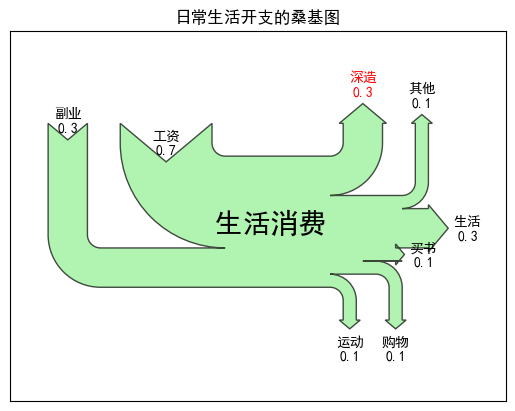

In [8]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# 消费收入与支出数据
flows = [0.7, 0.3, -0.3, -0.1, -0.3, -0.1, -0.1, -0.1]
# 流的标签列表
labels = ["工资", "副业", "生活", "购物", "深造", "运动", "其他", "买书"]
# 流的方向
orientations = [1, 1, 0, -1, 1, -1, 1, 0]
# 创建 Sankey 类对象
sankey = Sankey()
# 为桑基图添加数据
sankey.add(flows=flows,                     # 收入与支出数据
           labels=labels,                   # 数据标签
           orientations=orientations,       # 标签显示的方向
           color="black",                   # 边缘线条颜色
           fc="lightgreen",                 # 填充颜色
           patchlabel="生活消费 ",          # 图表中心的标签
           alpha=0.7)                       # 透明度
# 桑基图绘制完成的对象
diagrams = sankey.finish()
diagrams[0].texts[4].set_color("r")         # 将下标为 4 的数据标签设为红色
diagrams[0].texts[4].set_weight("bold")     # 将下标为 4 的数据标签设为字体加粗
diagrams[0].text.set_fontsize(20)           # 将中心标签的字体大小设为20
diagrams[0].text.set_fontweight("bold")     # 将中心标签的字体设为加粗
plt.title("日常生活开支的桑基图")
plt.show()

# 8.9　绘制树状图

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_excel(r'C:\Users\admin\Desktop\USArrests.xlsx')
plt.figure(figsize=(10, 6), dpi= 80)
plt.title("美国各州犯罪案件的树状图", fontsize=12)
# 绘制树状图
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop']], method='ward'), 
                      labels=df.State.values, color_threshold=100)
plt.xticks(fontsize=10.5)
plt.ylabel('案例数量(个)')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\admin\\Desktop\\USArrests.xlsx'

# 8.10　绘制华夫饼图

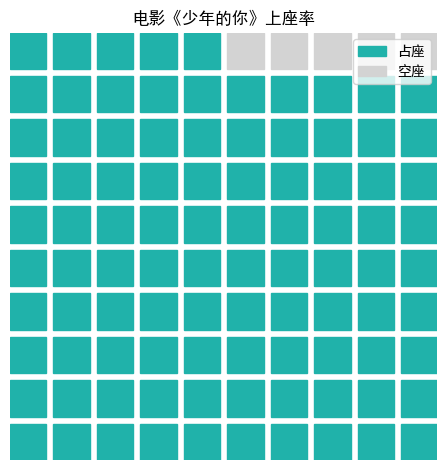

In [2]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
# 绘制华夫饼图
plt.figure(FigureClass=Waffle, rows=10, columns=10, 
           values=[95, 5],vertical=True, colors=['#20B2AA', '#D3D3D3'], 
           title={'label': '电影《少年的你》上座率'}, 
           legend={'loc': 'upper right', 'labels': ['占座', '空座']}
)
plt.show()